## Data/MC Comparison for Brem-Induced Clusters

#### Comparison of Clusters in Data vs MC. This is to validate the signal reconstruction process. We compare cluster from Z->MuMu events in Data vs those from a DY->ZMuMu (50-120 GeV for MLL). Both Data and MC are from 2023

In [1]:
import numpy as np
import pandas as pd
import uproot
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,"../")
import mplhep as hep
import pickle
import glob
import ROOT as rt
import coffea
import awkward as ak
from coffea import hist, processor
from coffea.nanoevents.methods import candidate
from coffea.nanoevents.methods import vector


Welcome to JupyROOT 6.28/00


In [2]:
#paths
data_path = "/eos/uscms/store/user/amalbert/MDSTriggerEff/TnP_Output_Data_061424/TnP_Output_2023.root"
MC_path = "/eos/uscms/store/user/amalbert/MDSTriggerEff/TnP_Output_MC_postBPix_062424/TnP_Output_DYMC_MLL50-120_postBPix_31900pb_weighted.root"


In [3]:
data_TFile = rt.TFile(data_path)
MC_TFile = rt.TFile(MC_path)

data_tree = data_TFile.Get("MuonSystem")
MC_tree = MC_TFile.Get("MuonSystem")

In [ ]:
data_tree.GetEntries()

In [ ]:
MC_tree.GetEntries()*24.75

In [ ]:
EraBCount = 0
for entry in data_tree:
    if getattr(data_tree, "runNum") <= 367079:
        EraBCount+=1
EraBCount

### ZMass Comparison of Selected Events

In [ ]:
c = rt.TCanvas("c", "c", 800, 600)
stack = rt.THStack("stack","Z Candidate Mass Comparison")
data_ZMass = rt.TH1F("ZMass_Data", "Z Mass Distribution for Data", nbinsx=80, xlow = 40, xup=120)
data_tree.Project("ZMass_Data", "ZMass")
data_ZMass.SetLineColor(rt.kRed)
data_ZMass.Scale(1/data_ZMass.GetEntries())
stack.Add(data_ZMass)


MC_ZMass = rt.TH1F("ZMass_MC", "Z Mass Distribution for MC", nbinsx=80, xlow = 40, xup=120)
MC_tree.Project("ZMass_MC", "ZMass")
MC_ZMass.SetLineColor(rt.kBlue)
MC_ZMass.Scale(1/MC_ZMass.GetEntries())
stack.Add(MC_ZMass)

stack.Draw("nostack HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(data_ZMass, "Data")
legend.AddEntry(MC_ZMass, "MC")
legend.Draw()

stack.GetXaxis().SetTitle("M_{ll} [GeV]");
stack.GetYaxis().SetTitle("Fraction of Events");

c.Draw()

### Pt Comparison

In [ ]:
c = rt.TCanvas("c", "c", 800, 600)
stack_leading = rt.THStack("stack","Leading Muon Pt Comparison")
data_LeadingPt = rt.TH1F("LeadingPt_Data", "Leading Muon Pt Distribution for Data", nbinsx=80, xlow = 0, xup=120)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree:
    data_LeadingPt.Fill(getattr(data_tree, "lepPt")[0])
data_LeadingPt.SetLineColor(rt.kRed)
data_LeadingPt.Scale(1/data_LeadingPt.GetEntries())
stack_leading.Add(data_LeadingPt)


MC_LeadingPt = rt.TH1F("LeadingPt_MC", "Leading Muon Pt Distribution for MC", nbinsx=80, xlow = 0, xup=120)
#MC_LeadingPt.Project("LeadingPt_MC", "LeadingMC")
for entry in MC_tree:
    MC_LeadingPt.Fill(getattr(MC_tree, "lepPt")[0])
MC_LeadingPt.SetLineColor(rt.kBlue)
MC_LeadingPt.Scale(1/MC_LeadingPt.GetEntries())
stack_leading.Add(MC_LeadingPt)

stack_leading.Draw("nostack HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(data_LeadingPt, "Data")
legend.AddEntry(MC_LeadingPt, "MC")
legend.Draw()

stack_leading.GetXaxis().SetTitle("Leading Muon pT [GeV]");
stack_leading.GetYaxis().SetTitle("Fraction of Events");

c.Draw()

In [ ]:
c = rt.TCanvas("c", "c", 800, 600)
stack_SubleadingPt = rt.THStack("stack","Subleading Muon Pt Comparison")
data_SubleadingPt = rt.TH1F("SubleadingPt_Data", "Subleading Muon Pt Distribution for Data", nbinsx=80, xlow = 0, xup=120)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree:
    data_SubleadingPt.Fill(getattr(data_tree, "lepPt")[1])
data_SubleadingPt.SetLineColor(rt.kRed)
data_SubleadingPt.Scale(1/data_SubleadingPt.GetEntries())
stack_SubleadingPt.Add(data_SubleadingPt)


MC_SubleadingPt = rt.TH1F("SubleadingPt_MC", "Subleading Muon Pt Distribution for MC", nbinsx=80, xlow = 0, xup=120)
#MC_LeadingPt.Project("LeadingPt_MC", "LeadingMC")
for entry in MC_tree:
    MC_SubleadingPt.Fill(getattr(MC_tree, "lepPt")[1])
MC_SubleadingPt.SetLineColor(rt.kBlue)
MC_SubleadingPt.Scale(1/MC_SubleadingPt.GetEntries())
stack_SubleadingPt.Add(MC_SubleadingPt)

stack_SubleadingPt.Draw("nostack HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(data_SubleadingPt, "Data", "lep")
legend.AddEntry(MC_SubleadingPt, "MC", "lep")
legend.Draw()

stack_SubleadingPt.GetXaxis().SetTitle("Subleading Muon pT [GeV]");
stack_SubleadingPt.GetYaxis().SetTitle("Fraction of Events");

c.Draw()

### Eta of All Muons

In [ ]:
c = rt.TCanvas("c", "c", 800, 600)
stack_eta = rt.THStack("stack","Muon Eta Comparison")
data_eta = rt.TH1F("Eta_Data", "Eta Distribution for Data", nbinsx=40, xlow = -4, xup=4)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree:
    data_eta.Fill(getattr(data_tree, "lepEta")[0])
    data_eta.Fill(getattr(data_tree, "lepEta")[1])
data_eta.SetLineColor(rt.kRed)
data_eta.Scale(1/data_eta.GetEntries())
stack_eta.Add(data_eta)


MC_eta = rt.TH1F("Eta", "Eta Distribution for MC", nbinsx=40, xlow = -4, xup=4)
#MC_LeadingPt.Project("LeadingPt_MC", "LeadingMC")
for entry in MC_tree:
    MC_eta.Fill(getattr(MC_tree, "lepEta")[0])
    MC_eta.Fill(getattr(MC_tree, "lepEta")[1])
MC_eta.SetLineColor(rt.kBlue)
MC_eta.Scale(1/MC_eta.GetEntries())
stack_eta.Add(MC_eta)

stack_eta.Draw("nostack HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(data_eta, "Data")
legend.AddEntry(MC_eta, "MC")
legend.Draw()

stack_eta.GetXaxis().SetTitle("Muon Eta [GeV]");
stack_eta.GetYaxis().SetTitle("Fraction of Events");

c.Draw()

### Phi

In [ ]:
c = rt.TCanvas("c", "c", 800, 600)
stack_phi = rt.THStack("stack","Muon Phi Comparison")
data_phi = rt.TH1F("Phi_Data", "Phi Distribution for Data", nbinsx=40, xlow = -4, xup=4)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree:
    data_phi.Fill(getattr(data_tree, "lepPhi")[0])
    data_phi.Fill(getattr(data_tree, "lepPhi")[1])
data_phi.SetLineColor(rt.kRed)
data_phi.Scale(1/data_phi.GetEntries())
stack_phi.Add(data_phi)


MC_phi= rt.TH1F("Eta", "Eta Distribution for MC", nbinsx=40, xlow = -4, xup=4)
#MC_LeadingPt.Project("LeadingPt_MC", "LeadingMC")
for entry in MC_tree:
    MC_phi.Fill(getattr(MC_tree, "lepPhi")[0])
    MC_phi.Fill(getattr(MC_tree, "lepPhi")[1])
MC_phi.SetLineColor(rt.kBlue)
MC_phi.Scale(1/MC_phi.GetEntries())
stack_phi.Add(MC_phi)

stack_phi.Draw("nostack HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(data_phi, "Data")
legend.AddEntry(MC_phi, "MC")
legend.Draw()

stack_phi.GetXaxis().SetTitle("Muon Phi [GeV]");
stack_phi.GetYaxis().SetTitle("Fraction of Events");

c.Draw()

### Properties of Muons Matched to Clusters

In [ ]:
def deltaR(eta1, phi1, eta2, phi2):
    return np.sqrt((eta1-eta2)**2+(phi1-phi2)**2)

In [ ]:
c = rt.TCanvas("c", "c", 800, 600)
stack_leading = rt.THStack("stack","Pt of Muon Matched to Cluster")
data_LeadingPt = rt.TH1F("LeadingPt_Data", "Leading Muon Pt Distribution for Data", nbinsx=80, xlow = 0, xup=120)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
data_cluster_count = 0
for entry in data_tree:
    for i in range(data_tree.nCscRechitClusters):
        if not (data_tree.cscRechitCluster_matchToProbeMuon[i] and data_tree.cscRechitCluster_passME1112Veto[i] and data_tree.cscRechitCluster_PassTimeVeto[i]):
            continue
        for j in range(data_tree.nLeptons):
            if deltaR(data_tree.lepEta[j],data_tree.lepPhi[j], data_tree.cscRechitClusterEta[i],data_tree.cscRechitClusterPhi[i])<0.4:
                data_LeadingPt.Fill(data_tree.lepPt[j])
                data_cluster_count+=1
data_LeadingPt.SetLineColor(rt.kRed)
data_LeadingPt.Scale(1/data_LeadingPt.GetEntries())
stack_leading.Add(data_LeadingPt)
print(data_cluster_count)

MC_cluster_count=0
MC_LeadingPt = rt.TH1F("LeadingPt_MC", "Leading Muon Pt Distribution for MC", nbinsx=80, xlow = 0, xup=120)
#MC_LeadingPt.Project("LeadingPt_MC", "LeadingMC")
for entry in MC_tree:
    for i in range(MC_tree.nCscRechitClusters):
        if not (MC_tree.cscRechitCluster_matchToProbeMuon[i] and MC_tree.cscRechitCluster_passME1112Veto[i] and MC_tree.cscRechitCluster_PassTimeVeto[i]):
            continue
        for j in range(MC_tree.nLeptons):
            if deltaR(MC_tree.lepEta[j],MC_tree.lepPhi[j], MC_tree.cscRechitClusterEta[i],MC_tree.cscRechitClusterPhi[i])<0.4:
                MC_LeadingPt.Fill(MC_tree.lepPt[j])
                MC_cluster_count+=1
MC_LeadingPt.SetLineColor(rt.kBlue)
MC_LeadingPt.Scale(1/MC_LeadingPt.GetEntries())
stack_leading.Add(MC_LeadingPt)

stack_leading.Draw("nostack HIST E0")
print(MC_cluster_count)

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(data_LeadingPt, "Data")
legend.AddEntry(MC_LeadingPt, "MC")
legend.Draw()

stack_leading.GetXaxis().SetTitle("Leading Muon pT [GeV]");
stack_leading.GetYaxis().SetTitle("Fraction of Events");

c.Draw()

In [ ]:
c = rt.TCanvas("c", "c", 800, 600)
stack_leading = rt.THStack("stack","Eta of Muon Matched to Cluster")
data_LeadingPt = rt.TH1F("LeadingPt_Data", "Leading Muon Pt Distribution for Data", nbinsx=40, xlow = -4, xup=4)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree:
    for i in range(data_tree.nCscRechitClusters):
        if not (data_tree.cscRechitCluster_matchToProbeMuon[i] and data_tree.cscRechitCluster_passME1112Veto[i] and data_tree.cscRechitCluster_PassTimeVeto[i]):
            continue
        for j in range(data_tree.nLeptons):
            if deltaR(data_tree.lepEta[j],data_tree.lepPhi[j], data_tree.cscRechitClusterEta[i],data_tree.cscRechitClusterPhi[i])<0.4:
                data_LeadingPt.Fill(data_tree.lepEta[j])
data_LeadingPt.SetLineColor(rt.kRed)
data_LeadingPt.Scale(1/data_LeadingPt.GetEntries())
stack_leading.Add(data_LeadingPt)


MC_LeadingPt = rt.TH1F("LeadingPt_MC", "Leading Muon Pt Distribution for MC", nbinsx=40, xlow = -4, xup=4)
#MC_LeadingPt.Project("LeadingPt_MC", "LeadingMC")
for entry in MC_tree:
    for i in range(MC_tree.nCscRechitClusters):
        if not (MC_tree.cscRechitCluster_matchToProbeMuon[i] and MC_tree.cscRechitCluster_passME1112Veto[i] and MC_tree.cscRechitCluster_PassTimeVeto[i]):
            continue
        for j in range(MC_tree.nLeptons):
            if deltaR(MC_tree.lepEta[j],MC_tree.lepPhi[j], MC_tree.cscRechitClusterEta[i],MC_tree.cscRechitClusterPhi[i])<0.4:
                MC_LeadingPt.Fill(MC_tree.lepEta[j])
MC_LeadingPt.SetLineColor(rt.kBlue)
MC_LeadingPt.Scale(1/MC_LeadingPt.GetEntries())
stack_leading.Add(MC_LeadingPt)

stack_leading.Draw("nostack HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(data_LeadingPt, "Data")
legend.AddEntry(MC_LeadingPt, "MC")
legend.Draw()

stack_leading.GetXaxis().SetTitle("Eta");
stack_leading.GetYaxis().SetTitle("Fraction of Events");

c.Draw()

In [ ]:
c = rt.TCanvas("c", "c", 800, 600)
stack_leading = rt.THStack("stack","Phi of Muon Matched to Cluster")
data_LeadingPt = rt.TH1F("LeadingPt_Data", "Leading Muon Pt Distribution for Data", nbinsx=40, xlow = -4, xup=4)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree:
    for i in range(data_tree.nCscRechitClusters):
        if not (data_tree.cscRechitCluster_matchToProbeMuon[i] and data_tree.cscRechitCluster_passME1112Veto[i] and data_tree.cscRechitCluster_PassTimeVeto[i]):
            continue
        for j in range(data_tree.nLeptons):
            if deltaR(data_tree.lepEta[j],data_tree.lepPhi[j], data_tree.cscRechitClusterEta[i],data_tree.cscRechitClusterPhi[i])<0.4:
                data_LeadingPt.Fill(data_tree.lepPhi[j])
data_LeadingPt.SetLineColor(rt.kRed)
data_LeadingPt.Scale(1/data_LeadingPt.GetEntries())
stack_leading.Add(data_LeadingPt)


MC_LeadingPt = rt.TH1F("LeadingPt_MC", "Leading Muon Pt Distribution for MC", nbinsx=40, xlow = -4, xup=4)
#MC_LeadingPt.Project("LeadingPt_MC", "LeadingMC")
for entry in MC_tree:
    for i in range(MC_tree.nCscRechitClusters):
        if not (MC_tree.cscRechitCluster_matchToProbeMuon[i] and MC_tree.cscRechitCluster_passME1112Veto[i] and MC_tree.cscRechitCluster_PassTimeVeto[i]):
            continue
        for j in range(MC_tree.nLeptons):
            if deltaR(MC_tree.lepEta[j],MC_tree.lepPhi[j], MC_tree.cscRechitClusterEta[i],MC_tree.cscRechitClusterPhi[i])<0.4:
                MC_LeadingPt.Fill(MC_tree.lepPhi[j])
MC_LeadingPt.SetLineColor(rt.kBlue)
MC_LeadingPt.Scale(1/MC_LeadingPt.GetEntries())
stack_leading.Add(MC_LeadingPt)

stack_leading.Draw("nostack HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(data_LeadingPt, "Data")
legend.AddEntry(MC_LeadingPt, "MC")
legend.Draw()

stack_leading.GetXaxis().SetTitle("Phi");
stack_leading.GetYaxis().SetTitle("Fraction of Events");

c.Draw()

### Cluster Properties

In [ ]:
c = rt.TCanvas("c", "c", 800, 600)
stack_clusterSize = rt.THStack("stack","Cluster Size")
data_clusterSize = rt.TH1F("ClusterSize_Data", "Cluster Size Distribution for Data", nbinsx=40, xlow = 0, xup=400)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree:
    for i in range(data_tree.nCscRechitClusters):
        if (data_tree.cscRechitCluster_matchToProbeMuon[i] and data_tree.cscRechitCluster_passME1112Veto[i] and data_tree.cscRechitCluster_PassTimeVeto[i]):
            data_clusterSize.Fill(data_tree.cscRechitClusterSize[i])
data_clusterSize.SetLineColor(rt.kRed)
data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_clusterSize.Add(data_clusterSize)


MC_clusterSize = rt.TH1F("ClusterSize_MC", "Cluster Size Distribution for MC", nbinsx=40, xlow = 0, xup=400)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in MC_tree:
    for i in range(MC_tree.nCscRechitClusters):
        if (MC_tree.cscRechitCluster_matchToProbeMuon[i] and MC_tree.cscRechitCluster_passME1112Veto[i] and MC_tree.cscRechitCluster_PassTimeVeto[i]):
            MC_clusterSize.Fill(MC_tree.cscRechitClusterSize[i])
MC_clusterSize.SetLineColor(rt.kBlue)
MC_clusterSize.Scale(1/MC_clusterSize.GetEntries())
stack_clusterSize.Add(MC_clusterSize)

stack_clusterSize.Draw("nostack HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(data_clusterSize, "Data")
legend.AddEntry(MC_clusterSize, "MC")
legend.Draw()

stack_clusterSize.GetXaxis().SetTitle("N_{Rechits}");
stack_clusterSize.GetYaxis().SetTitle("Fraction of Events");
c.SetLogy();
c.Draw()

In [ ]:
c = rt.TCanvas("c", "c", 800, 600)
stack_clusterSize = rt.THStack("stack","Cluster Eta")
data_clusterSize = rt.TH1F("ClusterSize_Data", "Cluster Size Distribution for Data", nbinsx=60, xlow = -4, xup=4)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree:
    for i in range(data_tree.nCscRechitClusters):
        if (data_tree.cscRechitCluster_matchToProbeMuon[i] and data_tree.cscRechitCluster_passME1112Veto[i] and data_tree.cscRechitCluster_PassTimeVeto[i]):
            data_clusterSize.Fill(data_tree.cscRechitClusterEta[i])
data_clusterSize.SetLineColor(rt.kRed)
data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_clusterSize.Add(data_clusterSize)


MC_clusterSize = rt.TH1F("ClusterSize_MC", "Cluster Size Distribution for MC", nbinsx=60, xlow = -4, xup=4)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in MC_tree:
    for i in range(MC_tree.nCscRechitClusters):
        if (MC_tree.cscRechitCluster_matchToProbeMuon[i] and MC_tree.cscRechitCluster_passME1112Veto[i] and MC_tree.cscRechitCluster_PassTimeVeto[i]):
            MC_clusterSize.Fill(MC_tree.cscRechitClusterEta[i])
MC_clusterSize.SetLineColor(rt.kBlue)
MC_clusterSize.Scale(1/MC_clusterSize.GetEntries())
stack_clusterSize.Add(MC_clusterSize)

stack_clusterSize.Draw("nostack HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(data_clusterSize, "Data")
legend.AddEntry(MC_clusterSize, "MC")
legend.Draw()

stack_clusterSize.GetXaxis().SetTitle("Eta")
stack_clusterSize.GetYaxis().SetTitle("Fraction of Events")

c.Draw()

In [ ]:
c = rt.TCanvas("c", "c", 800, 600)
stack_clusterSize = rt.THStack("stack","Cluster Phi")
data_clusterSize = rt.TH1F("ClusterSize_Data", "Cluster Size Distribution for Data", nbinsx=60, xlow = -4, xup=4)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree:
    for i in range(data_tree.nCscRechitClusters):
        if (data_tree.cscRechitCluster_matchToProbeMuon[i] and data_tree.cscRechitCluster_passME1112Veto[i] and data_tree.cscRechitCluster_PassTimeVeto[i]):
            data_clusterSize.Fill(data_tree.cscRechitClusterPhi[i])
data_clusterSize.SetLineColor(rt.kRed)
data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_clusterSize.Add(data_clusterSize)


MC_clusterSize = rt.TH1F("ClusterSize_MC", "Cluster Size Distribution for MC", nbinsx=60, xlow = -4, xup=4)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in MC_tree:
    for i in range(MC_tree.nCscRechitClusters):
        if (MC_tree.cscRechitCluster_matchToProbeMuon[i] and MC_tree.cscRechitCluster_passME1112Veto[i] and MC_tree.cscRechitCluster_PassTimeVeto[i]):
            MC_clusterSize.Fill(MC_tree.cscRechitClusterPhi[i])
MC_clusterSize.SetLineColor(rt.kBlue)
MC_clusterSize.Scale(1/MC_clusterSize.GetEntries())
stack_clusterSize.Add(MC_clusterSize)

stack_clusterSize.Draw("nostack HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(data_clusterSize, "Data")
legend.AddEntry(MC_clusterSize, "MC")
legend.Draw()

stack_clusterSize.GetXaxis().SetTitle("Phi")
stack_clusterSize.GetYaxis().SetTitle("Fraction of Events")

c.Draw()

In [ ]:
c = rt.TCanvas("c", "c", 800, 600)
stack_clusterSize = rt.THStack("stack","Cluster Time")
data_clusterSize = rt.TH1F("ClusterSize_Data", "Cluster Size Distribution for Data", nbinsx=60, xlow = -8, xup=20)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree:
    for i in range(data_tree.nCscRechitClusters):
        if (data_tree.cscRechitCluster_matchToProbeMuon[i] and data_tree.cscRechitCluster_passME1112Veto[i] and data_tree.cscRechitCluster_PassTimeVeto[i]):
            data_clusterSize.Fill(data_tree.cscRechitClusterTime[i])
data_clusterSize.SetLineColor(rt.kRed)
data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_clusterSize.Add(data_clusterSize)


MC_clusterSize = rt.TH1F("ClusterSize_MC", "Cluster Size Distribution for MC", nbinsx=60, xlow = -8, xup=20)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in MC_tree:
    for i in range(MC_tree.nCscRechitClusters):
        if (MC_tree.cscRechitCluster_matchToProbeMuon[i] and MC_tree.cscRechitCluster_passME1112Veto[i] and MC_tree.cscRechitCluster_PassTimeVeto[i]):
            MC_clusterSize.Fill(MC_tree.cscRechitClusterTime[i])
MC_clusterSize.SetLineColor(rt.kBlue)
MC_clusterSize.Scale(1/MC_clusterSize.GetEntries())
stack_clusterSize.Add(MC_clusterSize)

stack_clusterSize.Draw("nostack HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(data_clusterSize, "Data")
legend.AddEntry(MC_clusterSize, "MC")
legend.Draw()

stack_clusterSize.GetXaxis().SetTitle("Cluster Time")
stack_clusterSize.GetYaxis().SetTitle("Fraction of Events")

c.Draw()

In [ ]:
c = rt.TCanvas("c", "c", 800, 600)
stack_clusterSize = rt.THStack("stack","Cluster Time Spread")
data_clusterSize = rt.TH1F("ClusterSize_Data", "Cluster Size Distribution for Data", nbinsx=50, xlow = 0, xup=50)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree:
    for i in range(data_tree.nCscRechitClusters):
        if (data_tree.cscRechitCluster_matchToProbeMuon[i] and data_tree.cscRechitCluster_passME1112Veto[i] and data_tree.cscRechitCluster_PassTimeVeto[i]):
            data_clusterSize.Fill(data_tree.cscRechitClusterTimeSpread[i])
data_clusterSize.SetLineColor(rt.kRed)
data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_clusterSize.Add(data_clusterSize)


MC_clusterSize = rt.TH1F("ClusterSize_MC", "Cluster Size Distribution for MC", nbinsx=50, xlow = 0, xup=50)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in MC_tree:
    for i in range(MC_tree.nCscRechitClusters):
        if (MC_tree.cscRechitCluster_matchToProbeMuon[i] and MC_tree.cscRechitCluster_passME1112Veto[i] and MC_tree.cscRechitCluster_PassTimeVeto[i]):
            MC_clusterSize.Fill(MC_tree.cscRechitClusterTimeSpread[i])
MC_clusterSize.SetLineColor(rt.kBlue)
MC_clusterSize.Scale(1/MC_clusterSize.GetEntries())
stack_clusterSize.Add(MC_clusterSize)

stack_clusterSize.Draw("nostack HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(data_clusterSize, "Data")
legend.AddEntry(MC_clusterSize, "MC")
legend.Draw()

stack_clusterSize.GetXaxis().SetTitle("Cluster Time Spread")
stack_clusterSize.GetYaxis().SetTitle("Fraction of Events")

c.Draw()

In [ ]:
c = rt.TCanvas("c", "c", 800, 600)
stack_clusterSize = rt.THStack("stack","Weighted Cluster Time")
data_clusterSize = rt.TH1F("ClusterSize_Data", "Cluster Size Distribution for Data", nbinsx=60, xlow = -8, xup=20)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree:
    for i in range(data_tree.nCscRechitClusters):
        if (data_tree.cscRechitCluster_matchToProbeMuon[i] and data_tree.cscRechitCluster_passME1112Veto[i] and data_tree.cscRechitCluster_PassTimeVeto[i]):
            data_clusterSize.Fill(data_tree.cscRechitClusterTimeWeighted[i])
data_clusterSize.SetLineColor(rt.kRed)
data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_clusterSize.Add(data_clusterSize)


MC_clusterSize = rt.TH1F("ClusterSize_MC", "Cluster Size Distribution for MC", nbinsx=60, xlow = -8, xup=20)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in MC_tree:
    for i in range(MC_tree.nCscRechitClusters):
        if (MC_tree.cscRechitCluster_matchToProbeMuon[i] and MC_tree.cscRechitCluster_passME1112Veto[i] and MC_tree.cscRechitCluster_PassTimeVeto[i]):
            MC_clusterSize.Fill(MC_tree.cscRechitClusterTimeWeighted[i])
MC_clusterSize.SetLineColor(rt.kBlue)
MC_clusterSize.Scale(1/MC_clusterSize.GetEntries())
stack_clusterSize.Add(MC_clusterSize)

stack_clusterSize.Draw("nostack HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(data_clusterSize, "Data")
legend.AddEntry(MC_clusterSize, "MC")
legend.Draw()

stack_clusterSize.GetXaxis().SetTitle("Weighted Cluster Time")
stack_clusterSize.GetYaxis().SetTitle("Fraction of Events")

c.Draw()

In [ ]:
c = rt.TCanvas("c", "c", 800, 600)
stack_clusterSize = rt.THStack("stack","Weighted Cluster Time Spread")
data_clusterSize = rt.TH1F("ClusterSize_Data", "Cluster Size Distribution for Data", nbinsx=50, xlow = 0, xup=50)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree:
    for i in range(data_tree.nCscRechitClusters):
        if (data_tree.cscRechitCluster_matchToProbeMuon[i] and data_tree.cscRechitCluster_passME1112Veto[i] and data_tree.cscRechitCluster_PassTimeVeto[i]):
            data_clusterSize.Fill(data_tree.cscRechitClusterTimeSpreadWeightedAll[i])
data_clusterSize.SetLineColor(rt.kRed)
data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_clusterSize.Add(data_clusterSize)


MC_clusterSize = rt.TH1F("ClusterSize_MC", "Cluster Size Distribution for MC", nbinsx=50, xlow = 0, xup=50)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in MC_tree:
    for i in range(MC_tree.nCscRechitClusters):
        if (MC_tree.cscRechitCluster_matchToProbeMuon[i] and MC_tree.cscRechitCluster_passME1112Veto[i] and MC_tree.cscRechitCluster_PassTimeVeto[i]):
            MC_clusterSize.Fill(MC_tree.cscRechitClusterTimeSpreadWeightedAll[i])
MC_clusterSize.SetLineColor(rt.kBlue)
MC_clusterSize.Scale(1/MC_clusterSize.GetEntries())
stack_clusterSize.Add(MC_clusterSize)

stack_clusterSize.Draw("nostack HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(data_clusterSize, "Data")
legend.AddEntry(MC_clusterSize, "MC")
legend.Draw()

stack_clusterSize.GetXaxis().SetTitle("Weighted Cluster Time Spread")
stack_clusterSize.GetYaxis().SetTitle("Fraction of Events")

c.Draw()

### Investigating clusters at negative endcap to see if they correspond with those at phi=0

In [ ]:
c = rt.TCanvas("c", "c", 800, 600)
#stack_clusterSize = rt.THStack("stack","Cluster Eta")
data_eta_phi = rt.TH2F("Cluster Eta and Phi", "Cluster Eta and Phi Distribution for Data", nbinsx=60, xlow = -3, xup=3, nbinsy=60, ylow=-3.5, yup=3.5)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree:
    for i in range(data_tree.nCscRechitClusters):
        if (data_tree.cscRechitCluster_matchToProbeMuon[i] and data_tree.cscRechitCluster_passME1112Veto[i] and data_tree.cscRechitCluster_PassTimeVeto[i]):
            data_eta_phi.Fill(data_tree.cscRechitClusterEta[i], data_tree.cscRechitClusterPhi[i])
#data_clusterSize.SetLineColor(rt.kRed)
#data_eta_phi.Scale(1/data_eta_phi.GetEntries())
#gStyle.SetPalette(1)
data_eta_phi.Draw("colz")
data_eta_phi.SetStats(0)

data_eta_phi.GetXaxis().SetTitle("Eta")
data_eta_phi.GetYaxis().SetTitle("Phi")

c.Draw()

In [ ]:
c = rt.TCanvas("c", "c", 800, 600)
stack_clusterSize = rt.THStack("stack","Cluster Z")
data_clusterSize = rt.TH1F("ClusterSize_Data", "Cluster Z Distribution for Data", nbinsx=100, xlow = -1200, xup=1200)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree:
    for i in range(data_tree.nCscRechitClusters):
        if (data_tree.cscRechitCluster_matchToProbeMuon[i] and data_tree.cscRechitCluster_passME1112Veto[i] and data_tree.cscRechitCluster_PassTimeVeto[i]):
            data_clusterSize.Fill(data_tree.cscRechitClusterZ[i])
data_clusterSize.SetLineColor(rt.kRed)
data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_clusterSize.Add(data_clusterSize)


MC_clusterSize = rt.TH1F("ClusterSize_MC", "Cluster Size Distribution for MC", nbinsx=100, xlow = -1200, xup=1200)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in MC_tree:
    for i in range(MC_tree.nCscRechitClusters):
        if (MC_tree.cscRechitCluster_matchToProbeMuon[i] and MC_tree.cscRechitCluster_passME1112Veto[i] and MC_tree.cscRechitCluster_PassTimeVeto[i]):
            MC_clusterSize.Fill(MC_tree.cscRechitClusterZ[i])
MC_clusterSize.SetLineColor(rt.kBlue)
MC_clusterSize.Scale(1/MC_clusterSize.GetEntries())
stack_clusterSize.Add(MC_clusterSize)

stack_clusterSize.Draw("nostack HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(data_clusterSize, "Data")
legend.AddEntry(MC_clusterSize, "MC")
legend.Draw()

stack_clusterSize.GetXaxis().SetTitle("Z")
stack_clusterSize.GetYaxis().SetTitle("Fraction of Events")

c.Draw()

### Investigation of Cluster Properties for Events with high cluster multiplicity in ME4/1, negative endcap

In [3]:
#with open('ME41_weird_events.npy', 'rb') as f:
#    event_num_list = np.load(f)

with open('ME41_weird_events_newMerge.npy', 'rb') as f:
    event_num_list = np.load(f)

In [ ]:
with open('all_chambers_events_2022.npy', 'rb') as f:
    all_events_2022 = np.load(f)
    
with open('all_chambers_events_2023.npy', 'rb') as f:
    all_events_2023 = np.load(f)

In [ ]:
# #paths
# data_path = "/eos/uscms/store/user/amalbert/MDSTriggerEff/trigEff_output_combined_updated/triggEff_2022_2023_goodlumi.root"

# data_TFile_trigEff = rt.TFile(data_path)


# data_tree_trigEff = data_TFile_trigEff.Get("MuonSystem")


# data_path = "/eos/uscms/store/user/amalbert/MDSTriggerEff/trigEff_output_2022_updated/fixedMerge_trigEff_2022_052024_goodlumi.root"

# data_TFile_trigEff_2022 = rt.TFile(data_path)


# data_tree_trigEff_2022 = data_TFile_trigEff_2022.Get("MuonSystem")


In [4]:
data_path_2022 = "/uscms/home/amalbert/nobackup/CMSSW_10_6_20/src/run3_llp_analyzer/Run2022_L1_Eff_goodLumi.root"

data_TFile_trigEff_2022 = rt.TFile(data_path_2022)


data_tree_trigEff_2022 = data_TFile_trigEff_2022.Get("MuonSystem;2")

data_path_2023 = "/uscms/home/amalbert/nobackup/CMSSW_10_6_20/src/run3_llp_analyzer/Run2023_L1_Eff_goodLumi.root"

data_TFile_trigEff_2023 = rt.TFile(data_path_2023)


data_tree_trigEff_2023 = data_TFile_trigEff_2023.Get("MuonSystem;2")



Error in <TList::Clear>: A list is accessing an object (0x129c8570) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x12a51a90) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x12a5a6d0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x12a5aa40) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x12a5adb0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x12a5b120) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x12a5b650) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x12a5ba10) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x12a5c370) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x12a5c7

In [ ]:
# c = rt.TCanvas("c", "c", 800, 600)
# #stack_clusterSize = rt.THStack("stack","Cluster Eta")
# data_ME41_clustersize = rt.TH1F("Weird Events Cluster Size", "Cluster Size Distribution for ME4/1 Inefficient Clusters", nbinsx=60, xlow=400
#                                 , xup=1000)
# #data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
# for entry in data_tree_trigEff:
#     if data_tree_trigEff.evtNum not in event_num_list:
#         continue
#     for i in range(data_tree_trigEff.nCscRechitClusters):
#         if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
#             data_ME41_clustersize.Fill(data_tree_trigEff.cscRechitClusterSize[i])
# #data_clusterSize.SetLineColor(rt.kRed)
# #data_eta_phi.Scale(1/data_eta_phi.GetEntries())
# #gStyle.SetPalette(1)
# data_ME41_clustersize.Draw("colz")
# data_ME41_clustersize.SetStats(0)

# stack_clusterSize.GetXaxis().SetTitle("Cluster Size")
# stack_clusterSize.GetYaxis().SetTitle("Count")

# c.Draw()

at tree
at tree
At Plotting


Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).


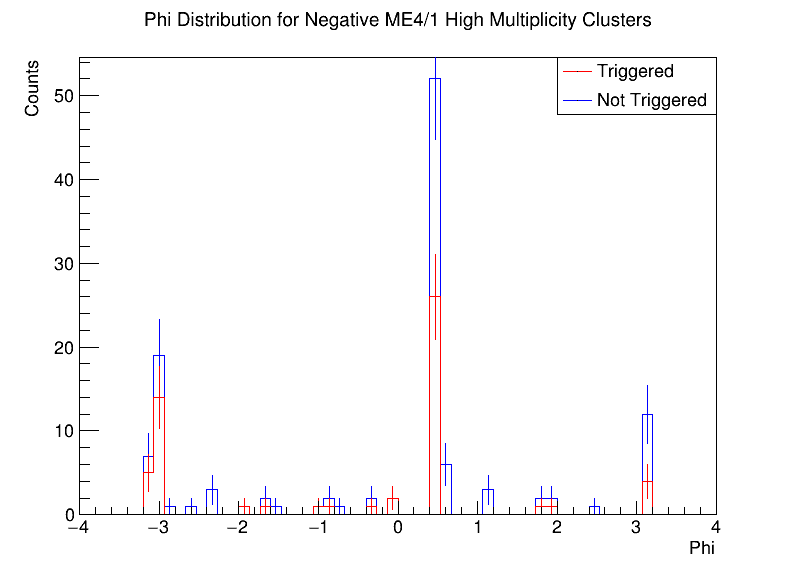

In [7]:
c = rt.TCanvas("c", "c", 800, 600)
stack_inefficienct_phi = rt.THStack("stack","Phi Distribution for Negative ME4/1 High Multiplicity Clusters")
trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Triggered", nbinsx=60, xlow=-4, xup=4)
not_trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Not Triggered", nbinsx=60, xlow=-4, xup=4)
for data_tree_trigEff in [data_tree_trigEff_2022, data_tree_trigEff_2023]:
    for entry in data_tree_trigEff:
        if data_tree_trigEff.evtNum not in event_num_list: 
            continue
        if data_tree_trigEff.L1_SingleMuShower_Nominal or data_tree_trigEff.L1_SingleMuShower_Tight:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    trigger_ME41_phi.Fill(data_tree_trigEff.cscRechitClusterPhi[i])
        else:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    not_trigger_ME41_phi.Fill(data_tree_trigEff.cscRechitClusterPhi[i])
trigger_ME41_phi.SetLineColor(rt.kRed)

#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(trigger_ME41_phi)

not_trigger_ME41_phi.SetLineColor(rt.kBlue)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(not_trigger_ME41_phi)


stack_inefficienct_phi.Draw("HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(trigger_ME41_phi, "Triggered")
legend.AddEntry(not_trigger_ME41_phi, "Not Triggered")
legend.Draw()

stack_inefficienct_phi.GetXaxis().SetTitle("Phi")
stack_inefficienct_phi.GetYaxis().SetTitle("Counts")

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).


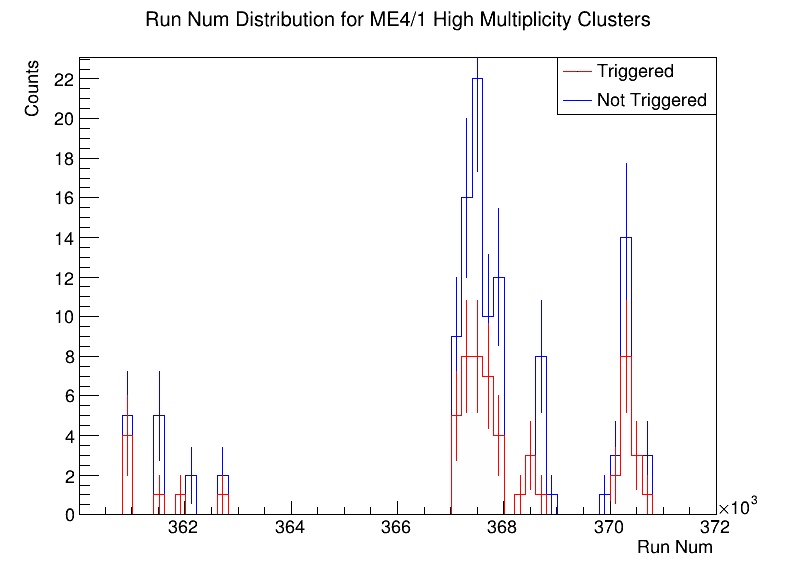

In [8]:
c = rt.TCanvas("c", "c", 800, 600)
stack_inefficienct_phi = rt.THStack("stack","Run Num Distribution for ME4/1 High Multiplicity Clusters")
trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Triggered", nbinsx=60, xlow=360019, xup=372000)
not_trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Not Triggered", nbinsx=60, xlow=360019, xup=372000)
for data_tree_trigEff in [data_tree_trigEff_2022, data_tree_trigEff_2023]:    
    for entry in data_tree_trigEff:
        if data_tree_trigEff.evtNum not in event_num_list: 
            continue
        if data_tree_trigEff.L1_SingleMuShower_Nominal or data_tree_trigEff.L1_SingleMuShower_Tight:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    trigger_ME41_phi.Fill(data_tree_trigEff.runNum)
        else:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    not_trigger_ME41_phi.Fill(data_tree_trigEff.runNum)
trigger_ME41_phi.SetLineColor(rt.kRed)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(trigger_ME41_phi)

not_trigger_ME41_phi.SetLineColor(rt.kBlue)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(not_trigger_ME41_phi)


stack_inefficienct_phi.Draw("HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(trigger_ME41_phi, "Triggered")
legend.AddEntry(not_trigger_ME41_phi, "Not Triggered")
legend.Draw()

stack_inefficienct_phi.GetXaxis().SetTitle("Run Num")
stack_inefficienct_phi.GetYaxis().SetTitle("Counts")

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).


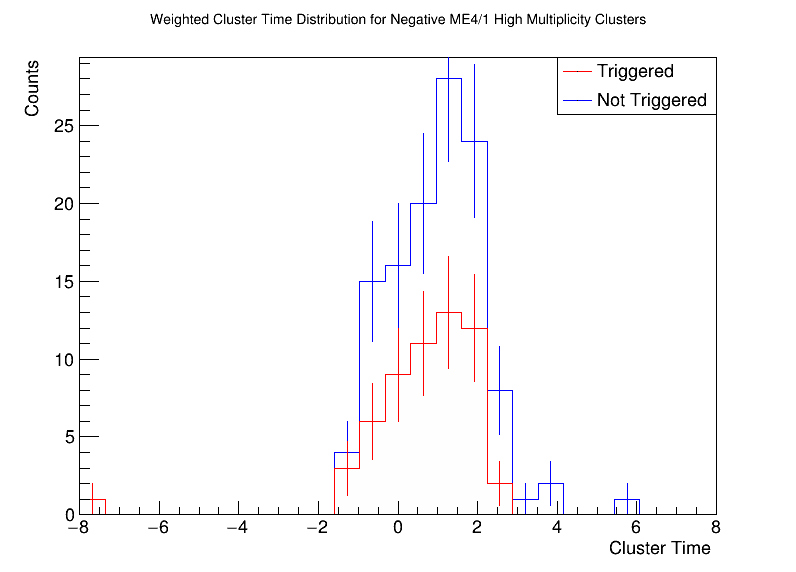

In [9]:
c = rt.TCanvas("c", "c", 800, 600)
stack_inefficienct_phi = rt.THStack("stack","Weighted Cluster Time Distribution for Negative ME4/1 High Multiplicity Clusters")
trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Triggered", nbinsx=25, xlow = -8, xup=8)
not_trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Not Triggered", nbinsx=25, xlow = -8, xup=8)
for data_tree_trigEff in [data_tree_trigEff_2022, data_tree_trigEff_2023]:    
    for entry in data_tree_trigEff:
        if data_tree_trigEff.evtNum not in event_num_list: 
            continue
        if data_tree_trigEff.L1_SingleMuShower_Nominal or data_tree_trigEff.L1_SingleMuShower_Tight:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    trigger_ME41_phi.Fill(data_tree_trigEff.cscRechitClusterTimeWeighted[i])
        else:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    not_trigger_ME41_phi.Fill(data_tree_trigEff.cscRechitClusterTimeWeighted[i])
trigger_ME41_phi.SetLineColor(rt.kRed)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(trigger_ME41_phi)

not_trigger_ME41_phi.SetLineColor(rt.kBlue)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(not_trigger_ME41_phi)


stack_inefficienct_phi.Draw("HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(trigger_ME41_phi, "Triggered")
legend.AddEntry(not_trigger_ME41_phi, "Not Triggered")
legend.Draw()

stack_inefficienct_phi.GetXaxis().SetTitle("Cluster Time")
stack_inefficienct_phi.GetYaxis().SetTitle("Counts")

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).


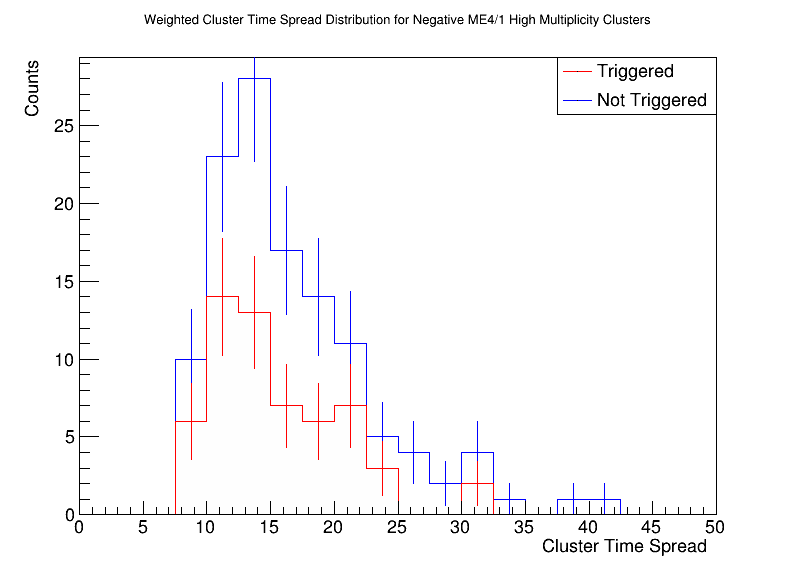

In [10]:
c = rt.TCanvas("c", "c", 800, 600)
stack_inefficienct_phi = rt.THStack("stack","Weighted Cluster Time Spread Distribution for Negative ME4/1 High Multiplicity Clusters")
trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Triggered", nbinsx=20, xlow = 0, xup=50)
not_trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Not Triggered", nbinsx=20, xlow = 0, xup=50)
for data_tree_trigEff in [data_tree_trigEff_2022, data_tree_trigEff_2023]:    
    for entry in data_tree_trigEff:
        if data_tree_trigEff.evtNum not in event_num_list: 
            continue
        if data_tree_trigEff.L1_SingleMuShower_Nominal or data_tree_trigEff.L1_SingleMuShower_Tight:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    trigger_ME41_phi.Fill(data_tree_trigEff.cscRechitClusterTimeSpreadWeightedAll[i])
        else:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    not_trigger_ME41_phi.Fill(data_tree_trigEff.cscRechitClusterTimeSpreadWeightedAll[i])
trigger_ME41_phi.SetLineColor(rt.kRed)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(trigger_ME41_phi)

not_trigger_ME41_phi.SetLineColor(rt.kBlue)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(not_trigger_ME41_phi)


stack_inefficienct_phi.Draw("HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(trigger_ME41_phi, "Triggered")
legend.AddEntry(not_trigger_ME41_phi, "Not Triggered")
legend.Draw()

stack_inefficienct_phi.GetXaxis().SetTitle("Cluster Time Spread")
stack_inefficienct_phi.GetYaxis().SetTitle("Counts")

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).


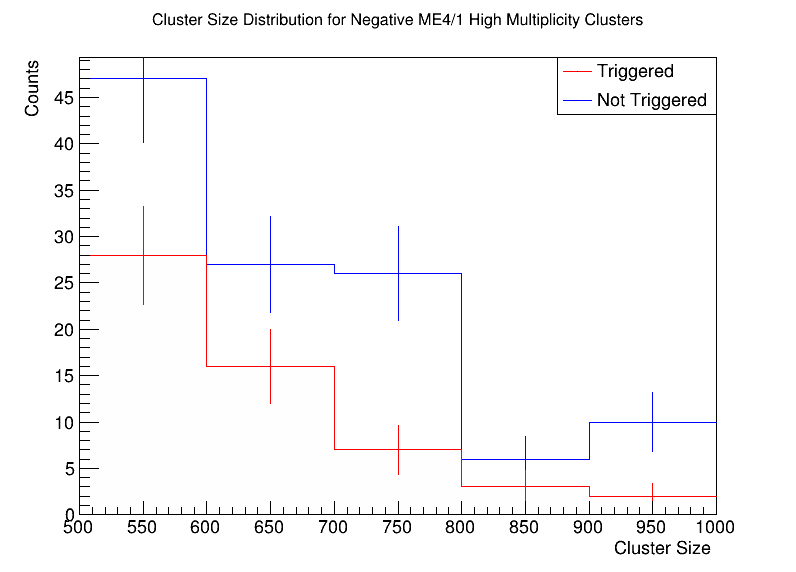

In [7]:
c = rt.TCanvas("c", "c", 800, 600)
stack_inefficienct_phi = rt.THStack("stack","Cluster Size Distribution for Negative ME4/1 High Multiplicity Clusters")
trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Triggered", nbinsx=5, xlow = 500, xup=1000)
not_trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Not Triggered", nbinsx=5, xlow = 500, xup=1000)
for data_tree_trigEff_1 in [data_tree_trigEff_2022, data_tree_trigEff_2023]:
    for entry in data_tree_trigEff_1:
        if data_tree_trigEff_1.evtNum not in event_num_list: 
            continue
        if data_tree_trigEff_1.L1_SingleMuShower_Nominal or data_tree_trigEff_1.L1_SingleMuShower_Tight:
            for i in range(data_tree_trigEff_1.nCscRechitClusters):
                if (data_tree_trigEff_1.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff_1.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff_1.cscRechitCluster_PassTimeVeto[i]):
                    trigger_ME41_phi.Fill(data_tree_trigEff_1.cscRechitClusterSize[i])
        else:
            for i in range(data_tree_trigEff_1.nCscRechitClusters):
                if (data_tree_trigEff_1.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff_1.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff_1.cscRechitCluster_PassTimeVeto[i]):
                    not_trigger_ME41_phi.Fill(data_tree_trigEff_1.cscRechitClusterSize[i])
trigger_ME41_phi.SetLineColor(rt.kRed)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(trigger_ME41_phi)

not_trigger_ME41_phi.SetLineColor(rt.kBlue)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(not_trigger_ME41_phi)


stack_inefficienct_phi.Draw("HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(trigger_ME41_phi, "Triggered")
legend.AddEntry(not_trigger_ME41_phi, "Not Triggered")
legend.Draw()

stack_inefficienct_phi.GetXaxis().SetTitle("Cluster Size")
stack_inefficienct_phi.GetYaxis().SetTitle("Counts")

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).


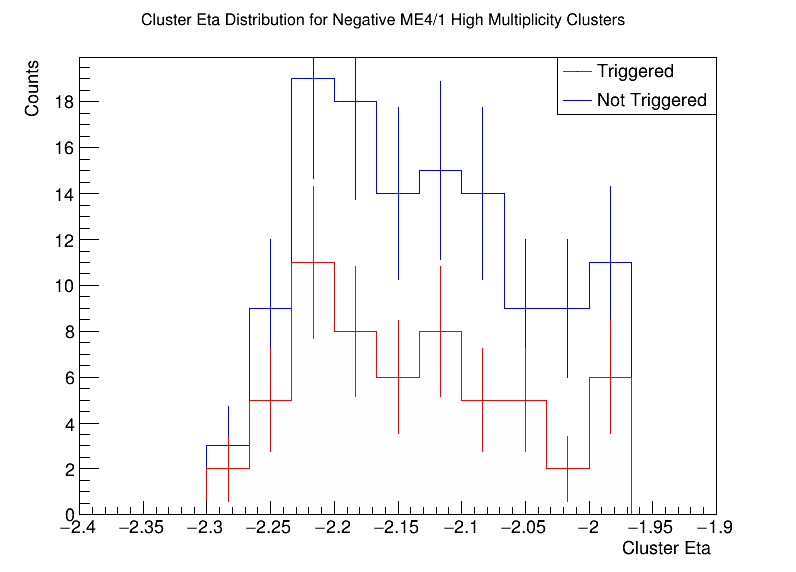

In [8]:
c = rt.TCanvas("c", "c", 800, 600)
stack_inefficienct_phi = rt.THStack("stack","Cluster Eta Distribution for Negative ME4/1 High Multiplicity Clusters")
trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Triggered", nbinsx=15, xlow = -2.4, xup=-1.9)
not_trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Not Triggered", nbinsx=15, xlow = -2.4, xup=-1.9)
for data_tree_trigEff in [data_tree_trigEff_2022, data_tree_trigEff_2023]:    
    for entry in data_tree_trigEff:
        if data_tree_trigEff.evtNum not in event_num_list: 
            continue
        if data_tree_trigEff.L1_SingleMuShower_Nominal or data_tree_trigEff.L1_SingleMuShower_Tight:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    trigger_ME41_phi.Fill(data_tree_trigEff.cscRechitClusterEta[i])
        else:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    not_trigger_ME41_phi.Fill(data_tree_trigEff.cscRechitClusterEta[i])
trigger_ME41_phi.SetLineColor(rt.kRed)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(trigger_ME41_phi)

not_trigger_ME41_phi.SetLineColor(rt.kBlue)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(not_trigger_ME41_phi)


stack_inefficienct_phi.Draw("HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(trigger_ME41_phi, "Triggered")
legend.AddEntry(not_trigger_ME41_phi, "Not Triggered")
legend.Draw()

stack_inefficienct_phi.GetXaxis().SetTitle("Cluster Eta")
stack_inefficienct_phi.GetYaxis().SetTitle("Counts")

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).


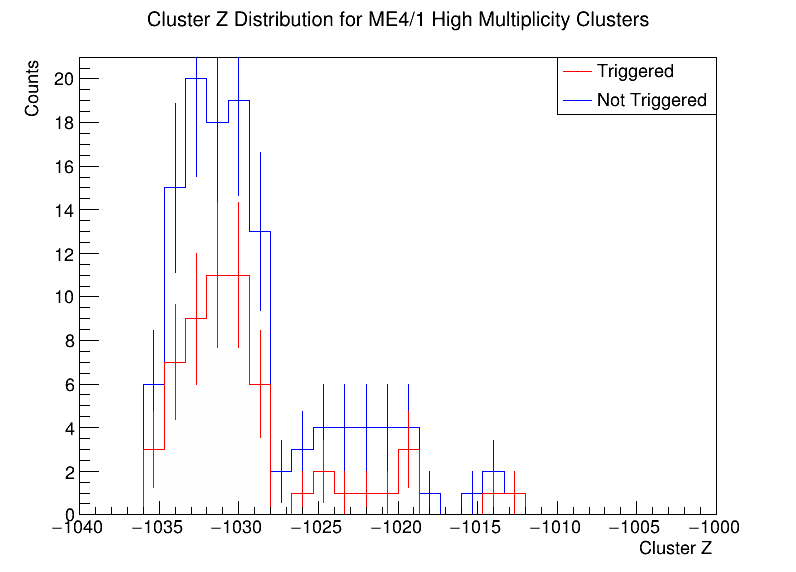

In [9]:
c = rt.TCanvas("c", "c", 800, 600)
stack_inefficienct_phi = rt.THStack("stack","Cluster Z Distribution for ME4/1 High Multiplicity Clusters")
trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Triggered", nbinsx=30, xlow = -1040, xup=-1000)
not_trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Not Triggered", nbinsx=30, xlow = -1040, xup=-1000)
for data_tree_trigEff in [data_tree_trigEff_2022, data_tree_trigEff_2023]:    
    for entry in data_tree_trigEff:
        if data_tree_trigEff.evtNum not in event_num_list: 
            continue
        if data_tree_trigEff.L1_SingleMuShower_Nominal or data_tree_trigEff.L1_SingleMuShower_Tight:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    trigger_ME41_phi.Fill(data_tree_trigEff.cscRechitClusterZ[i])
        else:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    not_trigger_ME41_phi.Fill(data_tree_trigEff.cscRechitClusterZ[i])
trigger_ME41_phi.SetLineColor(rt.kRed)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(trigger_ME41_phi)

not_trigger_ME41_phi.SetLineColor(rt.kBlue)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(not_trigger_ME41_phi)


stack_inefficienct_phi.Draw("HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(trigger_ME41_phi, "Triggered")
legend.AddEntry(not_trigger_ME41_phi, "Not Triggered")
legend.Draw()

stack_inefficienct_phi.GetXaxis().SetTitle("Cluster Z")
stack_inefficienct_phi.GetYaxis().SetTitle("Counts")

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).


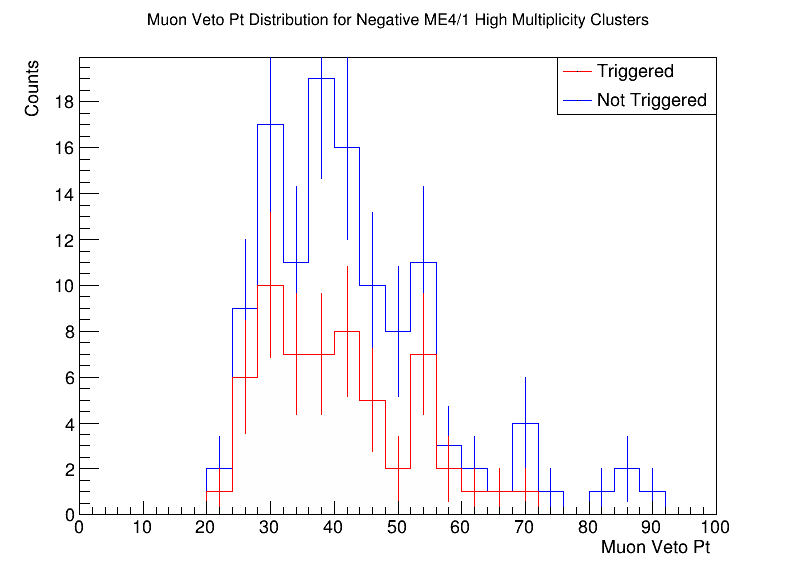

In [10]:
c = rt.TCanvas("c", "c", 800, 600)
stack_inefficienct_phi = rt.THStack("stack","Muon Veto Pt Distribution for Negative ME4/1 High Multiplicity Clusters")
trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Triggered", nbinsx=25, xlow = 0, xup=100)
not_trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Not Triggered", nbinsx=25, xlow = 0, xup=100)

for data_tree_trigEff in [data_tree_trigEff_2022, data_tree_trigEff_2023]:
    for entry in data_tree_trigEff:
        if data_tree_trigEff.evtNum not in event_num_list: 
            continue
        if data_tree_trigEff.L1_SingleMuShower_Nominal or data_tree_trigEff.L1_SingleMuShower_Tight:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    trigger_ME41_phi.Fill(data_tree_trigEff.cscRechitClusterMuonVetoPt[i])
        else:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    not_trigger_ME41_phi.Fill(data_tree_trigEff.cscRechitClusterMuonVetoPt[i])

trigger_ME41_phi.SetLineColor(rt.kRed)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(trigger_ME41_phi)

not_trigger_ME41_phi.SetLineColor(rt.kBlue)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(not_trigger_ME41_phi)


stack_inefficienct_phi.Draw("HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(trigger_ME41_phi, "Triggered")
legend.AddEntry(not_trigger_ME41_phi, "Not Triggered")
legend.Draw()

stack_inefficienct_phi.GetXaxis().SetTitle("Muon Veto Pt")
stack_inefficienct_phi.GetYaxis().SetTitle("Counts")

c.Draw()

37.95728302001953
50.674800872802734
44.13970947265625
84.33110046386719
27.991010665893555
78.49134826660156
49.33291244506836
32.29036331176758
43.27384567260742
22.92908477783203
7.0303239822387695
54.41966247558594
38.8720703125
42.2223014831543
80.33020782470703
65.01424407958984
119.47493743896484
52.4031867980957
40.22628402709961
32.099205017089844
27.544567108154297
26.288902282714844
53.4905891418457
17.60497283935547
76.2742691040039
8.170071601867676
32.557594299316406
39.29018020629883
20.095346450805664
78.25872802734375
95.85694885253906
16.834609985351562
47.1596565246582
9.046218872070312
17.54127311706543
24.3066349029541
49.54631042480469
53.622222900390625
36.0665397644043
88.94764709472656
53.846065521240234
73.58802032470703
36.35909652709961
40.81448745727539
96.33262634277344
50.076393127441406
53.98688888549805
116.01301574707031
14.007574081420898
100.0945053100586
26.457448959350586
8.225113868713379
82.45025634765625
33.00118637084961
88.26632690429688
61.76

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).


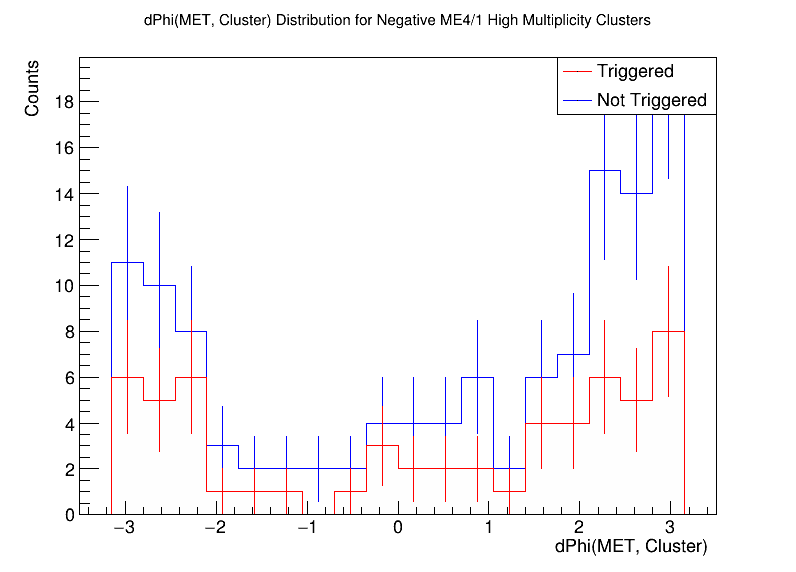

In [15]:
c = rt.TCanvas("c", "c", 800, 600)
stack_inefficienct_phi = rt.THStack("stack","dPhi(MET, Cluster) Distribution for Negative ME4/1 High Multiplicity Clusters")
trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Triggered", nbinsx=20, xlow = -3.5, xup=3.5)
not_trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Not Triggered", nbinsx=20, xlow = -3.5, xup=3.5)
for data_tree_trigEff in [data_tree_trigEff_2022, data_tree_trigEff_2023]:
    for entry in data_tree_trigEff:
        if data_tree_trigEff.evtNum not in event_num_list: 
            continue
        if data_tree_trigEff.L1_SingleMuShower_Nominal or data_tree_trigEff.L1_SingleMuShower_Tight:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    trigger_ME41_phi.Fill(data_tree_trigEff.cscRechitClusterMet_dPhi[i])
                    print(data_tree_trigEff.met)
        else:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    not_trigger_ME41_phi.Fill(data_tree_trigEff.cscRechitClusterMet_dPhi[i])

trigger_ME41_phi.SetLineColor(rt.kRed)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(trigger_ME41_phi)

not_trigger_ME41_phi.SetLineColor(rt.kBlue)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(not_trigger_ME41_phi)


stack_inefficienct_phi.Draw("HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(trigger_ME41_phi, "Triggered")
legend.AddEntry(not_trigger_ME41_phi, "Not Triggered")
legend.Draw()

stack_inefficienct_phi.GetXaxis().SetTitle("dPhi(MET, Cluster)")
stack_inefficienct_phi.GetYaxis().SetTitle("Counts")

c.Draw()

tree
tree


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).


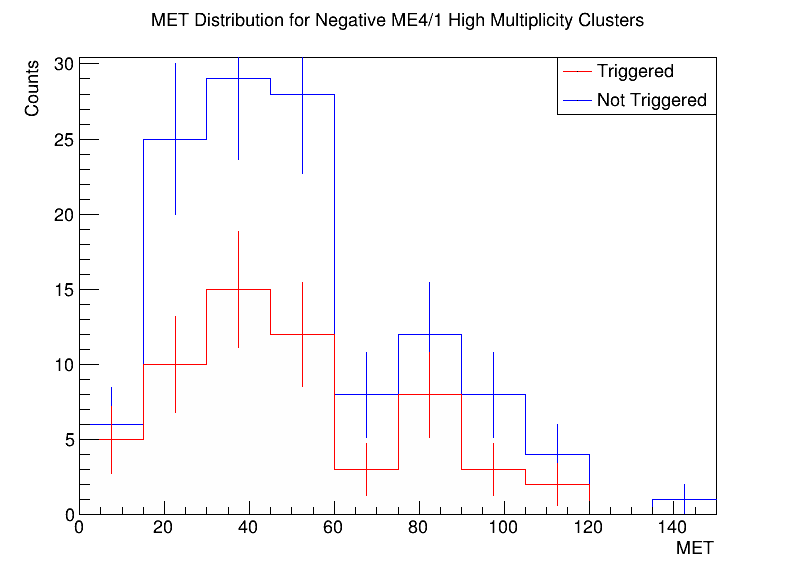

In [14]:
c = rt.TCanvas("c", "c", 800, 600)
stack_inefficienct_phi = rt.THStack("stack","MET Distribution for Negative ME4/1 High Multiplicity Clusters")
trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Triggered", nbinsx=10, xlow = 0, xup=150)
not_trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Not Triggered", nbinsx=10, xlow = 0, xup=150)
for data_tree_trigEff in [data_tree_trigEff_2022, data_tree_trigEff_2023]:
    print("tree")
    for entry in data_tree_trigEff:
        if data_tree_trigEff.evtNum not in event_num_list: 
            continue
        if data_tree_trigEff.L1_SingleMuShower_Nominal or data_tree_trigEff.L1_SingleMuShower_Tight:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    trigger_ME41_phi.Fill(data_tree_trigEff.met)
                    #print(data_tree_trigEff.met)
        else:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    not_trigger_ME41_phi.Fill(data_tree_trigEff.met)

trigger_ME41_phi.SetLineColor(rt.kRed)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(trigger_ME41_phi)

not_trigger_ME41_phi.SetLineColor(rt.kBlue)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(not_trigger_ME41_phi)


stack_inefficienct_phi.Draw("HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(trigger_ME41_phi, "Triggered")
legend.AddEntry(not_trigger_ME41_phi, "Not Triggered")
legend.Draw()

stack_inefficienct_phi.GetXaxis().SetTitle("MET")
stack_inefficienct_phi.GetYaxis().SetTitle("Counts")

c.Draw()

tree
tree


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).


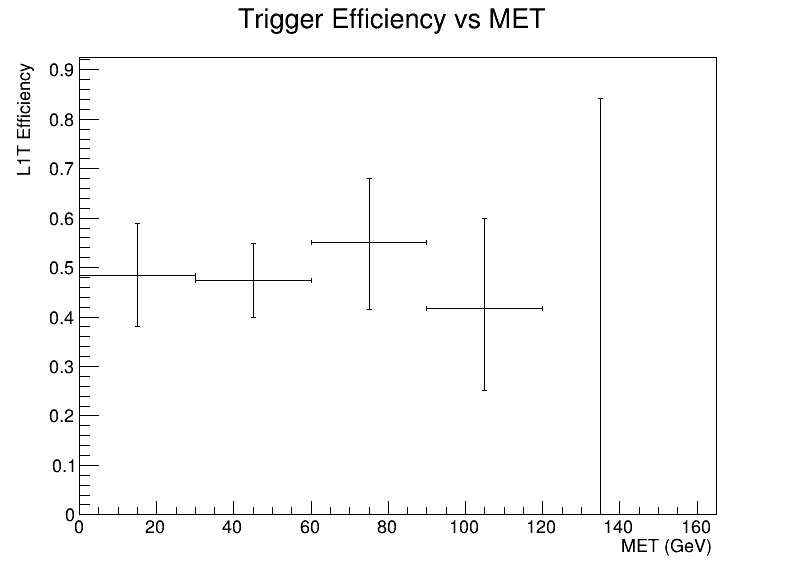

In [10]:
c = rt.TCanvas("c", "c", 800, 600)
stack_inefficienct_phi = rt.THStack("stack","MET Distribution for Negative ME4/1 High Multiplicity Clusters")
num = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Triggered", nbinsx=5, xlow = 0, xup=150)
denom = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Not Triggered", nbinsx=5, xlow = 0, xup=150)
for data_tree_trigEff in [data_tree_trigEff_2022, data_tree_trigEff_2023]:
    print("tree")
    for entry in data_tree_trigEff:
        if data_tree_trigEff.evtNum not in event_num_list: 
            continue
        if data_tree_trigEff.L1_SingleMuShower_Nominal or data_tree_trigEff.L1_SingleMuShower_Tight:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    num.Fill(data_tree_trigEff.met)
                    denom.Fill(data_tree_trigEff.met)
                    #print(data_tree_trigEff.met)
        else:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    denom.Fill(data_tree_trigEff.met)

#trigger_ME41_phi.SetLineColor(rt.kRed)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
#stack_inefficienct_phi.Add(trigger_ME41_phi)

#not_trigger_ME41_phi.SetLineColor(rt.kBlue)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
#stack_inefficienct_phi.Add(not_trigger_ME41_phi)

eff = rt.TEfficiency(num, denom)
eff.SetStatisticOption(rt.TEfficiency.kFCP) 
    
    #current_plot = dump_chamber_efficiency_plot(chamber, num_hist, denom_hist, bins)
eff.SetTitle("Trigger Efficiency vs MET;MET (GeV);L1T Efficiency")
eff.Draw()
#stack_inefficienct_phi.Draw("HIST E0")

#legend = rt.TLegend(0.9,0.8,0.7,0.9)
#legend.AddEntry(trigger_ME41_phi, "Triggered")
#legend.AddEntry(not_trigger_ME41_phi, "Not Triggered")
#legend.Draw()

#stack_inefficienct_phi.GetXaxis().SetTitle("MET")
#stack_inefficienct_phi.GetYaxis().SetTitle("Counts")

c.Draw()

tree
tree


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).


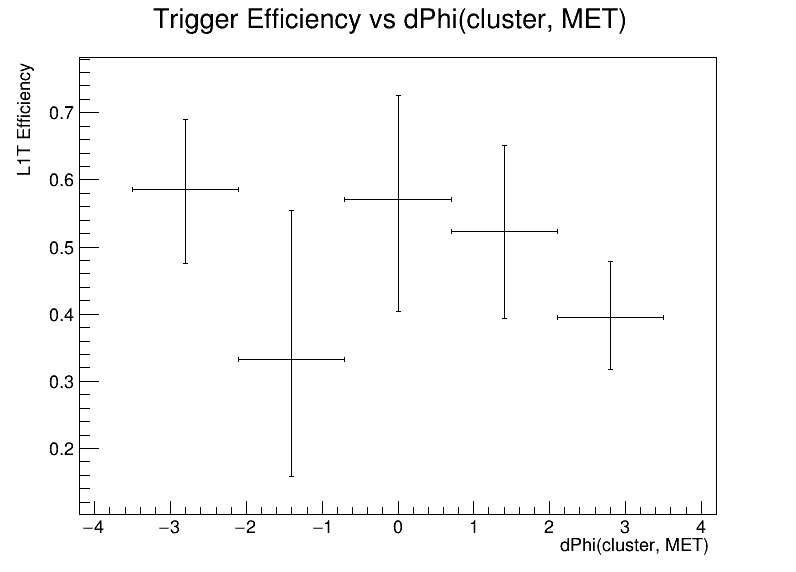

In [13]:
c = rt.TCanvas("c", "c", 800, 600)
stack_inefficienct_phi = rt.THStack("stack","MET Distribution for Negative ME4/1 High Multiplicity Clusters")
num = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Triggered", nbinsx=5, xlow = -3.5, xup=3.5)
denom = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Not Triggered", nbinsx=5, xlow = -3.5, xup=3.5)
for data_tree_trigEff in [data_tree_trigEff_2022, data_tree_trigEff_2023]:
    print("tree")
    for entry in data_tree_trigEff:
        if data_tree_trigEff.evtNum not in event_num_list: 
            continue
        if data_tree_trigEff.L1_SingleMuShower_Nominal or data_tree_trigEff.L1_SingleMuShower_Tight:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    num.Fill(data_tree_trigEff.cscRechitClusterMet_dPhi[i])
                    denom.Fill(data_tree_trigEff.cscRechitClusterMet_dPhi[i])
                    #print(data_tree_trigEff.met)
        else:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    denom.Fill(data_tree_trigEff.cscRechitClusterMet_dPhi[i])

#trigger_ME41_phi.SetLineColor(rt.kRed)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
#stack_inefficienct_phi.Add(trigger_ME41_phi)

#not_trigger_ME41_phi.SetLineColor(rt.kBlue)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
#stack_inefficienct_phi.Add(not_trigger_ME41_phi)

eff = rt.TEfficiency(num, denom)
eff.SetStatisticOption(rt.TEfficiency.kFCP) 
    
    #current_plot = dump_chamber_efficiency_plot(chamber, num_hist, denom_hist, bins)
eff.SetTitle("Trigger Efficiency vs dPhi(cluster, MET);dPhi(cluster, MET);L1T Efficiency")
eff.Draw()
#stack_inefficienct_phi.Draw("HIST E0")

#legend = rt.TLegend(0.9,0.8,0.7,0.9)
#legend.AddEntry(trigger_ME41_phi, "Triggered")
#legend.AddEntry(not_trigger_ME41_phi, "Not Triggered")
#legend.Draw()

#stack_inefficienct_phi.GetXaxis().SetTitle("MET")
#stack_inefficienct_phi.GetYaxis().SetTitle("Counts")

c.Draw()

In [ ]:
c = rt.TCanvas("c", "c", 800, 600)
#stack_clusterSize = rt.THStack("stack","Cluster Eta")
data_ME41_clustersize = rt.TH1F("Weird Events Cluster Size", "Phi Distribution for ME4/1 Inefficient Clusters - 2022", nbinsx=60, xlow=-4, xup=4)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree_trigEff_2022 or data_tree_trigEff.L1_SingleMuShower_Nominal:
    if data_tree_trigEff_2022.evtNum not in event_num_list:
        continue
    for i in range(data_tree_trigEff.nCscRechitClusters):
        if (data_tree_trigEff_2022.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff_2022.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff_2022.cscRechitCluster_PassTimeVeto[i]):
            data_ME41_clustersize.Fill(data_tree_trigEff_2022.cscRechitClusterPhi[i])
            if data_tree_trigEff_2022.cscRechitClusterPhi[i]>3:
                print(data_tree_trigEff_2022.runNum)
#data_clusterSize.SetLineColor(rt.kRed)
#data_eta_phi.Scale(1/data_eta_phi.GetEntries())
#gStyle.SetPalette(1)
data_ME41_clustersize.Draw("colz")
data_ME41_clustersize.SetStats(0)

stack_clusterSize.GetXaxis().SetTitle("Phi")
stack_clusterSize.GetYaxis().SetTitle("Count")

c.Draw()

In [ ]:
c = rt.TCanvas("c", "c", 800, 600)
#stack_clusterSize = rt.THStack("stack","Cluster Eta")
data_ME41_clustersize = rt.TH1F("Weird Events Cluster Size", "Eta Distribution for ME4/1 Inefficient Clusters", nbinsx=60, xlow=-1.7, xup=-2.5)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree_trigEff:
    #if data_tree_trigEff.evtNum not in event_num_list or data_tree_trigEff.L1_SingleMuShower_Nominal:
    if data_tree_trigEff.evtNum not in event_num_list:
        continue
    for i in range(data_tree_trigEff.nCscRechitClusters):
        if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
            data_ME41_clustersize.Fill(data_tree_trigEff.cscRechitClusterEta[i])
#data_clusterSize.SetLineColor(rt.kRed)
#data_eta_phi.Scale(1/data_eta_phi.GetEntries())
#gStyle.SetPalette(1)
data_ME41_clustersize.Draw("colz")
data_ME41_clustersize.SetStats(0)

stack_clusterSize.GetXaxis().SetTitle("Eta")
stack_clusterSize.GetYaxis().SetTitle("Count")

c.Draw()

### Same type of Plots for TrigEff Data

In [ ]:
#paths
data_path_all = "/eos/uscms/store/user/amalbert/MDSTriggerEff/trigEff_output_combined_updated/triggEff_2022_2023_goodlumi.root"

data_TFile_trigEff_all = rt.TFile(data_path_all)


data_tree_trigEff_all = data_TFile_trigEff_all.Get("MuonSystem")


data_path_2022 = "/eos/uscms/store/user/amalbert/MDSTriggerEff/trigEff_output_2022_updated/fixedMerge_trigEff_2022_052024_goodlumi.root"

data_TFile_trigEff_2022 = rt.TFile(data_path_2022)


data_tree_trigEff_2022 = data_TFile_trigEff_2022.Get("MuonSystem")


data_path_2023 = "/eos/uscms/store/user/amalbert/MDSTriggerEff/trigEff_output_2023_updated/trigEff_2023_052024_goodlumi.root"

data_TFile_trigEff_2023 = rt.TFile(data_path_2023)


data_tree_trigEff_2023 = data_TFile_trigEff_2023.Get("MuonSystem")


In [ ]:
c = rt.TCanvas("c", "c", 900, 600)
#stack_clusterSize = rt.THStack("stack","Cluster Eta")
data_eta_phi_2022 = rt.TH2F("Cluster Eta and Phi", "Cluster Eta and Phi Distribution for 2022 Data", nbinsx=60, xlow = -3, xup=3, nbinsy=60, ylow=-3.5, yup=3.5)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree_trigEff_2022:
    for i in range(data_tree_trigEff_2022.nCscRechitClusters):
        if (data_tree_trigEff_2022.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff_2022.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff_2022.cscRechitCluster_PassTimeVeto[i] and data_tree_trigEff_2022.nCscRechitClusters==1):
            data_eta_phi_2022.Fill(data_tree_trigEff_2022.cscRechitClusterEta[i], data_tree_trigEff_2022.cscRechitClusterPhi[i])
#data_clusterSize.SetLineColor(rt.kRed)
#data_eta_phi.Scale(1/data_eta_phi.GetEntries())
#gStyle.SetPalette(1)
data_eta_phi_2022.Draw("colz")
data_eta_phi_2022.SetStats(0)

data_eta_phi_2022.GetXaxis().SetTitle("Eta")
data_eta_phi_2022.GetYaxis().SetTitle("Phi")

c.Draw()

In [ ]:
c = rt.TCanvas("c", "c", 900, 600)
#stack_clusterSize = rt.THStack("stack","Cluster Eta")
data_eta_phi_2023 = rt.TH2F("Cluster Eta and Phi", "Cluster Eta and Phi Distribution for 2023 Data", nbinsx=60, xlow = -3, xup=3, nbinsy=60, ylow=-3.5, yup=3.5)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree_trigEff_2023:
    for i in range(data_tree_trigEff_2023.nCscRechitClusters):
        if (data_tree_trigEff_2023.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff_2023.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff_2023.cscRechitCluster_PassTimeVeto[i] and data_tree_trigEff_2023.nCscRechitClusters==1):
            data_eta_phi_2023.Fill(data_tree_trigEff_2023.cscRechitClusterEta[i], data_tree_trigEff_2023.cscRechitClusterPhi[i])
#data_clusterSize.SetLineColor(rt.kRed)
#data_eta_phi.Scale(1/data_eta_phi.GetEntries())
#gStyle.SetPalette(1)
data_eta_phi_2023.Draw("colz")
data_eta_phi_2023.SetStats(0)

data_eta_phi_2023.GetXaxis().SetTitle("Eta")
data_eta_phi_2023.GetYaxis().SetTitle("Phi")

c.Draw()

In [ ]:
c = rt.TCanvas("c", "c", 900, 600)
#stack_clusterSize = rt.THStack("stack","Cluster Eta")
data_eta_phi_2022 = rt.TH2F("Cluster Eta and Phi", "Cluster Eta and Phi Distribution for 2022 Data", nbinsx=30, xlow = -3, xup=3, nbinsy=30, ylow=-3.5, yup=3.5)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree_trigEff_2022:
    if data_tree_trigEff_2022.evtNum not in all_events_2022:
        continue
    for i in range(data_tree_trigEff_2022.nCscRechitClusters):
        if (data_tree_trigEff_2022.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff_2022.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff_2022.cscRechitCluster_PassTimeVeto[i] and data_tree_trigEff_2022.nCscRechitClusters==1):
            data_eta_phi_2022.Fill(data_tree_trigEff_2022.cscRechitClusterEta[i], data_tree_trigEff_2022.cscRechitClusterPhi[i])
#data_clusterSize.SetLineColor(rt.kRed)
#data_eta_phi.Scale(1/data_eta_phi.GetEntries())
#gStyle.SetPalette(1)
data_eta_phi_2022.GetZaxis().SetRangeUser(0, 75);
data_eta_phi_2022.Draw("colz")
data_eta_phi_2022.SetStats(0)

data_eta_phi_2022.GetXaxis().SetTitle("Eta")
data_eta_phi_2022.GetYaxis().SetTitle("Phi")

c.Draw()

In [ ]:
c = rt.TCanvas("c", "c", 900, 600)
#stack_clusterSize = rt.THStack("stack","Cluster Eta")
data_eta_phi_2023 = rt.TH2F("Cluster Eta and Phi", "Cluster Eta and Phi Distribution for 2023 Data", nbinsx=30, xlow = -3, xup=3, nbinsy=30, ylow=-3.5, yup=3.5)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree_trigEff_2023:
    if data_tree_trigEff_2023.evtNum not in all_events_2023:
        continue
    for i in range(data_tree_trigEff_2023.nCscRechitClusters):
        if (data_tree_trigEff_2023.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff_2023.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff_2022.cscRechitCluster_PassTimeVeto[i] and data_tree_trigEff_2022.nCscRechitClusters==1):
            data_eta_phi_2023.Fill(data_tree_trigEff_2023.cscRechitClusterEta[i], data_tree_trigEff_2023.cscRechitClusterPhi[i])
#data_clusterSize.SetLineColor(rt.kRed)
#data_eta_phi.Scale(1/data_eta_phi.GetEntries())
#gStyle.SetPalette(1)
data_eta_phi_2023.GetZaxis().SetRangeUser(0, 75);
data_eta_phi_2023.Draw("colz")
data_eta_phi_2023.SetStats(0)

data_eta_phi_2023.GetXaxis().SetTitle("Eta")
data_eta_phi_2023.GetYaxis().SetTitle("Phi")

c.Draw()

In [ ]:
c = rt.TCanvas("c", "c", 900, 600)
#stack_clusterSize = rt.THStack("stack","Cluster Eta")
data_eta_phi_2022 = rt.TH2F("Cluster Eta and Phi", "Cluster Eta and Phi Distribution for 2022 Data, ME3/1 and ME4/1", nbinsx=60, xlow = -3, xup=3, nbinsy=60, ylow=-3.5, yup=3.5)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree_trigEff_2022:
    for i in range(data_tree_trigEff_2022.nCscRechitClusters):
        if (data_tree_trigEff_2022.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff_2022.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff_2022.cscRechitCluster_PassTimeVeto[i] and abs(data_tree_trigEff_2022.cscRechitClusterZ[i])<915 and abs(data_tree_trigEff_2022.cscRechitClusterEta[i])>1.9 and data_tree_trigEff_2022.nCscRechitClusters==1):
            data_eta_phi_2022.Fill(data_tree_trigEff_2022.cscRechitClusterEta[i], data_tree_trigEff_2022.cscRechitClusterPhi[i])
#data_clusterSize.SetLineColor(rt.kRed)
#data_eta_phi.Scale(1/data_eta_phi.GetEntries())
#gStyle.SetPalette(1)
data_eta_phi_2022.Draw("colz")
data_eta_phi_2022.SetStats(0)

data_eta_phi_2022.GetXaxis().SetTitle("Eta")
data_eta_phi_2022.GetYaxis().SetTitle("Phi")

c.Draw()

In [ ]:
c = rt.TCanvas("c", "c", 900, 600)
#stack_clusterSize = rt.THStack("stack","Cluster Eta")
data_eta_phi_2023 = rt.TH2F("Cluster Eta and Phi", "Cluster Eta and Phi Distribution for 2023 Data, ME3/1 and ME4/1", nbinsx=60, xlow = -3, xup=3, nbinsy=60, ylow=-3.5, yup=3.5)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree_trigEff_2023:
    for i in range(data_tree_trigEff_2023.nCscRechitClusters):
        if (data_tree_trigEff_2023.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff_2023.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff_2023.cscRechitCluster_PassTimeVeto[i] and abs(data_tree_trigEff_2023.cscRechitClusterZ[i])>915 and abs(data_tree_trigEff_2023.cscRechitClusterEta[i])>1.9 and data_tree_trigEff_2023.nCscRechitClusters==1):
            data_eta_phi_2023.Fill(data_tree_trigEff_2023.cscRechitClusterEta[i], data_tree_trigEff_2023.cscRechitClusterPhi[i])
#data_clusterSize.SetLineColor(rt.kRed)
#data_eta_phi.Scale(1/data_eta_phi.GetEntries())
#gStyle.SetPalette(1)
data_eta_phi_2023.Draw("colz")
data_eta_phi_2023.SetStats(0)

data_eta_phi_2023.GetXaxis().SetTitle("Eta")
data_eta_phi_2023.GetYaxis().SetTitle("Phi")

c.Draw()

In [ ]:
data_tree_trigEff.Print("*Met*")